In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import ADASYN

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the singlecell_classification data
data_path = '/content/drive/MyDrive/fulldata.csv'
# Read the CSV data
df = pd.read_csv(data_path)


In [ ]:
df

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


# Random Forest

## tumour detection

In [ ]:
df['is_Epithelial_cells'] = df['CellType'].apply(lambda x: 1 if x == 'Epithelial cells' else 0)

counts = df['is_Epithelial_cells'].value_counts()

print(counts)
display(df)

1    12345
0     3150
Name: is_Epithelial_cells, dtype: int64


,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1,is_Epithelial_cells
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547,1
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1


In [ ]:
X = df.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y = df['is_Epithelial_cells']
display(X)
display(y)

,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,RP11-206L10.9,FAM87B,LINC00115,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.501,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.455,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,0.0,0.0,0.505,0.505,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


0        0
1        1
2        1
3        1
4        1
        ..
15490    1
15491    1
15492    1
15493    1
15494    1
Name: is_Epithelial_cells, Length: 15495, dtype: int64

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_classification
from collections import Counter

# Print the original class distribution
print('Original dataset shape %s' % Counter(y))

# Initialize the ADASYN sampler
adasyn = ADASYN(random_state=42)

# Fit and resample the data
X_res, y_res = adasyn.fit_resample(X, y)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({1: 12345, 0: 3150})
Resampled dataset shape Counter({0: 12725, 1: 12345})


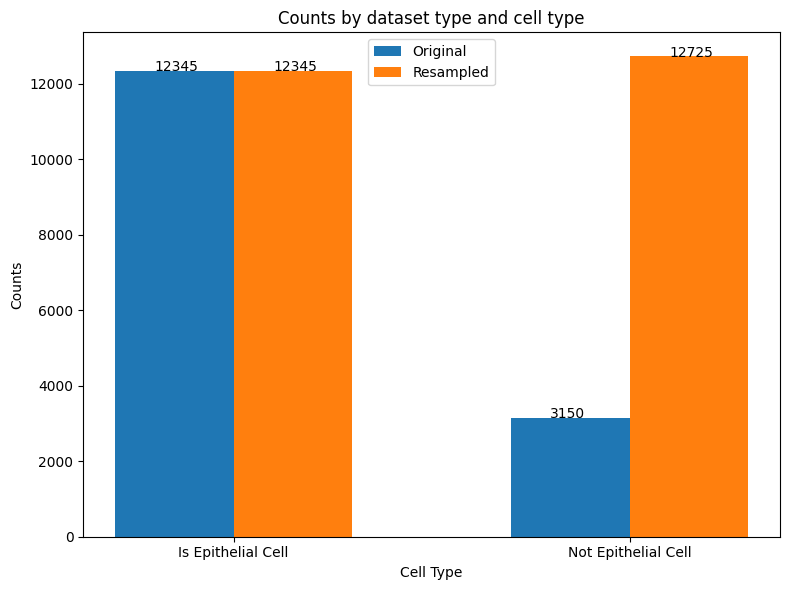

In [ ]:
import matplotlib.pyplot as plt

# Original dataset counts
original_counts = [12345, 3150]
# Resampled dataset counts
resampled_counts = [12345, 12725]

# Set up the bar positions
bar_width = 0.3

index = range(len(original_counts))

# Create bars
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(index, original_counts, bar_width, label='Original')
bar2 = ax.bar([i + bar_width for i in index], resampled_counts, bar_width, label='Resampled')



# Annotate the bars with their counts
for i, v in enumerate(original_counts):
    ax.text(i - 0.05, v + 100, str(v), va='center')
for i, v in enumerate(resampled_counts):
    ax.text(i + bar_width - 0.05, v + 100, str(v), va='center')

# Label the chart
ax.set_xlabel('Cell Type')
ax.set_ylabel('Counts')
ax.set_title('Counts by dataset type and cell type')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(['Is Epithelial Cell', 'Not Epithelial Cell'])
ax.legend(loc='upper center')  # put legend in the upper right corner

# Display the chart
plt.tight_layout()
plt.savefig("balance_distribution.png")  # save as a high-resolution PNG

plt.show()



In [ ]:
# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train1, y_train1)
y_pred = model.predict(X_test1)
print('Random Forest Accuracy:', accuracy_score(y_test1, y_pred))

class_labels = np.unique(np.concatenate((y_test1, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test1, y_pred, target_names=class_labels_str)
print(report)



Random Forest Accuracy: 0.8047757341077767
              precision    recall  f1-score   support

           0       0.54      0.21      0.30       625
           1       0.83      0.95      0.89      2474

    accuracy                           0.80      3099
   macro avg       0.68      0.58      0.60      3099
weighted avg       0.77      0.80      0.77      3099



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)



In [ ]:
# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)



Random Forest Accuracy: 0.8699641005185481
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      2554
           1       0.82      0.94      0.88      2460

    accuracy                           0.87      5014
   macro avg       0.88      0.87      0.87      5014
weighted avg       0.88      0.87      0.87      5014



In [ ]:
importance_series = pd.Series(importances, index=X.columns)

top_10_features = importance_series.sort_values(ascending=False)[:10].index

# Select the important features from the original DataFrame
df_important = df[top_10_features]
df_important

X_10 = df_important
y = df['is_Epithelial_cells']

# Print the original class distribution
print('Original dataset shape %s' % Counter(y))

# Initialize the ADASYN sampler
adasyn = ADASYN(random_state=42)

# Fit and resample the data
X_res10, y_res = adasyn.fit_resample(X_10, y)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))


# Split the data into training and test sets
X_train10, X_test10, y_train10, y_test10 = train_test_split(X_res10, y_res, test_size=0.2, random_state=42)

# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train10, y_train10)
y_pred10 = model.predict(X_test10)
print('Random Forest Accuracy:', accuracy_score(y_test10, y_pred10))

class_labels = np.unique(np.concatenate((y_test10, y_pred10)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test10, y_pred10, target_names=class_labels_str)
print(report)

Original dataset shape Counter({1: 12345, 0: 3150})
Resampled dataset shape Counter({1: 12345, 0: 12281})
Random Forest Accuracy: 0.783597239139261
              precision    recall  f1-score   support

           0       0.75      0.85      0.79      2435
           1       0.83      0.72      0.77      2491

    accuracy                           0.78      4926
   macro avg       0.79      0.78      0.78      4926
weighted avg       0.79      0.78      0.78      4926



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Prepare an empty list to store accuracy results
accuracy_results = []

# Prepare an empty list to store number of features
features_count = []

for i in range(10, 0, -1):
    # Select the top i features
    top_features = importance_series.sort_values(ascending=False)[:i].index
    df_important = df[top_features]
    X_i = df_important
    y = df['is_Epithelial_cells']

    # Resample with ADASYN
    X_res_i, y_res = ADASYN(random_state=42).fit_resample(X_i, y)

    # Split the data into training and test sets
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_res_i, y_res, test_size=0.2, random_state=42)

    # Fit the Random Forest model
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train_i, y_train_i)

    # Predict and evaluate the model
    y_pred_i = model.predict(X_test_i)
    accuracy = accuracy_score(y_test_i, y_pred_i)
    print(f'\nTop {i} Features:')
    print(f'Random Forest Accuracy: {accuracy}')
    class_labels = np.unique(np.concatenate((y_test_i, y_pred_i)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test_i, y_pred_i, target_names=class_labels_str)
    print(report)

    accuracy_results.append(accuracy)
    features_count.append(i)



Top 10 Features:
Random Forest Accuracy: 0.7886723507917174
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      2435
           1       0.83      0.73      0.78      2491

    accuracy                           0.79      4926
   macro avg       0.79      0.79      0.79      4926
weighted avg       0.79      0.79      0.79      4926


Top 9 Features:
Random Forest Accuracy: 0.7848281472442546
              precision    recall  f1-score   support

           0       0.75      0.84      0.80      2454
           1       0.82      0.73      0.77      2463

    accuracy                           0.78      4917
   macro avg       0.79      0.78      0.78      4917
weighted avg       0.79      0.78      0.78      4917


Top 8 Features:
Random Forest Accuracy: 0.7858971833760094
              precision    recall  f1-score   support

           0       0.76      0.86      0.80      2585
           1       0.83      0.71      0.77      2492

 

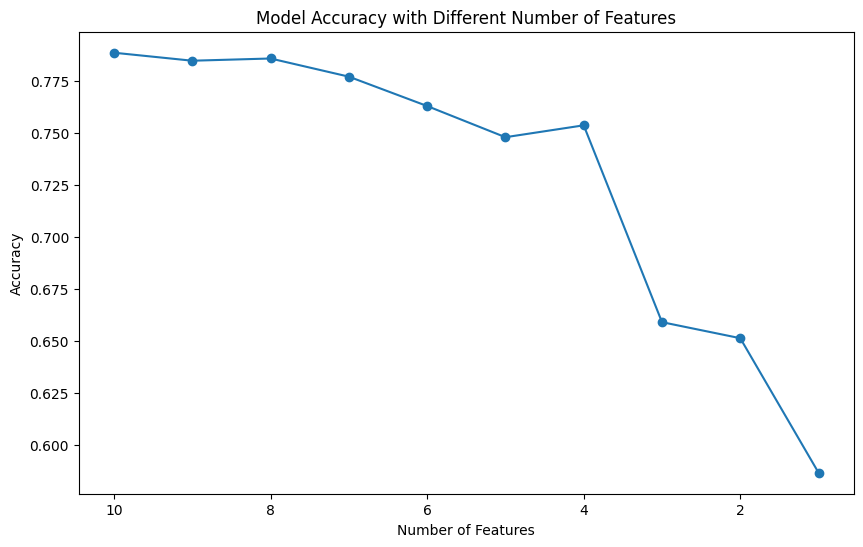

In [ ]:
# Now let's plot the results
plt.figure(figsize=(10, 6))
plt.plot(features_count, accuracy_results, marker='o')
plt.title('Model Accuracy with Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.gca().invert_xaxis() # invert the x-axis
plt.show()


## patient detection

In [ ]:

display(df)

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
X = df.drop(['reference','tumourID','CellType'], axis=1)
y = df['tumourID']
display(X)
display(y)

,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,RP11-206L10.9,FAM87B,LINC00115,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.501,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.455,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,0.0,0.0,0.505,0.505,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


0        SC162
1        SC162
2        SC162
3        SC162
4        SC162
         ...  
15490    SC156
15491    SC156
15492    SC156
15493    SC156
15494    SC156
Name: tumourID, Length: 15495, dtype: object

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X and y are already defined

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomForest with GridSearchCV
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict using best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

       SC156       1.00      0.99      0.99       917
       SC162       0.99      0.99      0.99       429
       SC172       0.96      0.88      0.91       487
       SC174       0.88      0.98      0.93       681
       SC177       1.00      0.96      0.98       585

    accuracy                           0.96      3099
   macro avg       0.96      0.96      0.96      3099
weighted avg       0.97      0.96      0.96      3099

[[906   0   1  10   0]
 [  1 426   0   2   0]
 [  0   0 427  60   0]
 [  0   6  11 664   0]
 [  0   0   8  15 562]]


In [ ]:
# Overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.6f}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Overall Accuracy: 0.963214
              precision    recall  f1-score   support

       SC156       1.00      0.99      0.99       917
       SC162       0.99      0.99      0.99       429
       SC172       0.96      0.88      0.91       487
       SC174       0.88      0.98      0.93       681
       SC177       1.00      0.96      0.98       585

    accuracy                           0.96      3099
   macro avg       0.96      0.96      0.96      3099
weighted avg       0.97      0.96      0.96      3099

[[906   0   1  10   0]
 [  1 426   0   2   0]
 [  0   0 427  60   0]
 [  0   6  11 664   0]
 [  0   0   8  15 562]]


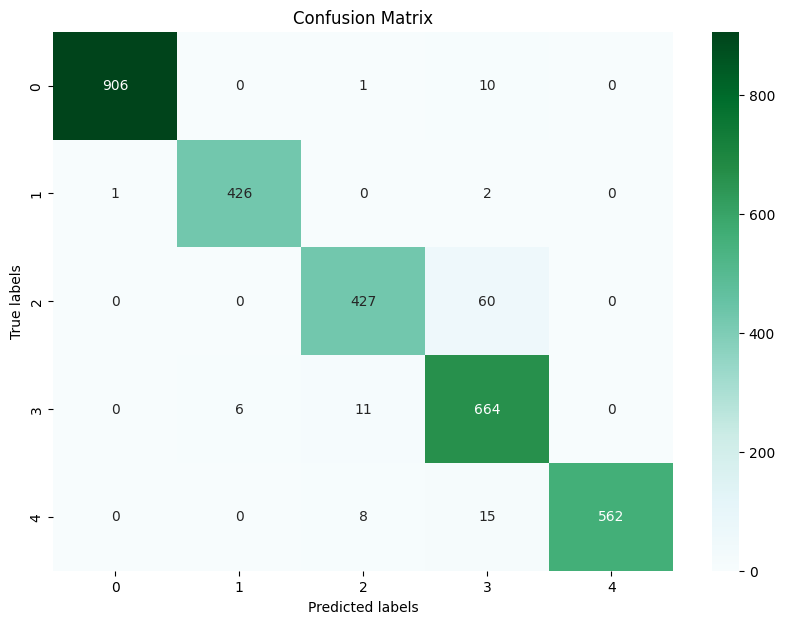

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='BuGn')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig("rf_pm.png")
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X and y are already defined

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to search for SVM
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Specifies the kernel type to be used in the algorithm.
    'degree': [2, 3, 4],  # Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
}

# SVM with GridSearchCV
svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict using best model
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.6f}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# xgboost

## tumour detection

In [ ]:
df['is_Epithelial_cells'] = df['CellType'].apply(lambda x: 1 if x == 'Epithelial cells' else 0)

counts = df['is_Epithelial_cells'].value_counts()

print(counts)
display(df)

1    12345
0     3150
Name: is_Epithelial_cells, dtype: int64


,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1,is_Epithelial_cells
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547,1
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1


In [ ]:
X = df.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y = df['is_Epithelial_cells']
display(X)
display(y)

,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,RP11-206L10.9,FAM87B,LINC00115,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.501,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.455,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,0.0,0.0,0.505,0.505,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


0        0
1        1
2        1
3        1
4        1
        ..
15490    1
15491    1
15492    1
15493    1
15494    1
Name: is_Epithelial_cells, Length: 15495, dtype: int64

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_classification
from collections import Counter

# Print the original class distribution
print('Original dataset shape %s' % Counter(y))

# Initialize the ADASYN sampler
adasyn = ADASYN(random_state=42)

# Fit and resample the data
X_res, y_res = adasyn.fit_resample(X, y)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({1: 12345, 0: 3150})
Resampled dataset shape Counter({0: 12725, 1: 12345})


In [ ]:
y

0        0
1        1
2        1
3        1
4        1
        ..
15490    1
15491    1
15492    1
15493    1
15494    1
Name: is_Epithelial_cells, Length: 15495, dtype: int64

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearSVC(max_iter=1000)
model.fit(X_train1, y_train1)
y_pred = model.predict(X_test1)
print('Linear SVM Accuracy:', accuracy_score(y_test1, y_pred))




Linear SVM Accuracy: 0.7618586640851888


In [ ]:


class_labels = np.unique(np.concatenate((y_test1, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test1, y_pred, target_names=class_labels_str)
print(report)

              precision    recall  f1-score   support

           0       0.41      0.44      0.42       625
           1       0.86      0.84      0.85      2474

    accuracy                           0.76      3099
   macro avg       0.63      0.64      0.64      3099
weighted avg       0.77      0.76      0.76      3099



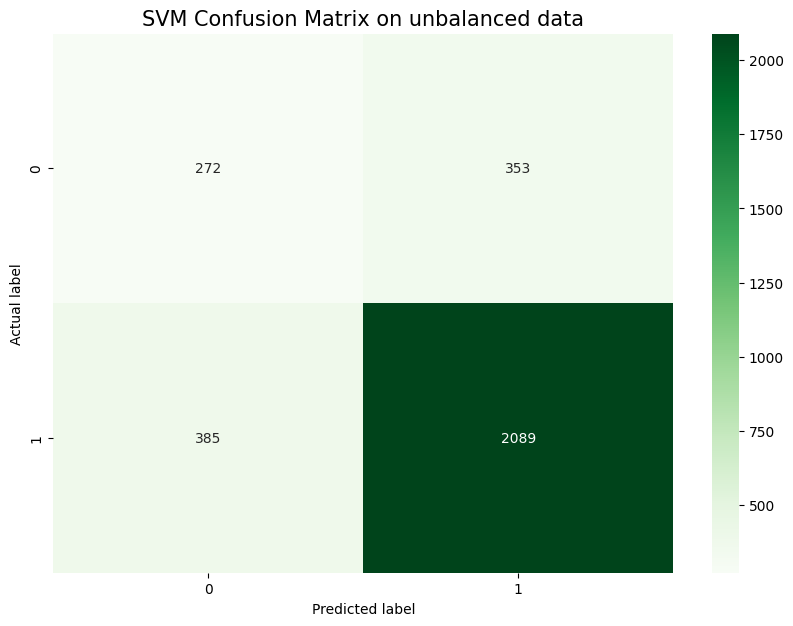

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test1, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('SVM Confusion Matrix on unbalanced data', size=15)
plt.savefig("SVM_unbalanced.png")

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))
class_labels = np.unique(np.concatenate((y_test1, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.8990825688073395
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2554
           1       0.97      0.82      0.89      2460

    accuracy                           0.90      5014
   macro avg       0.91      0.90      0.90      5014
weighted avg       0.91      0.90      0.90      5014



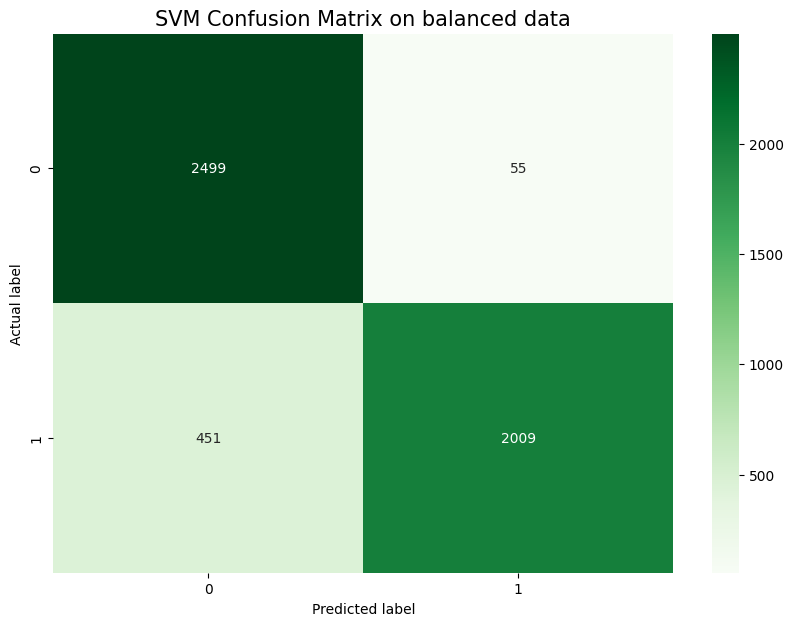

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('SVM Confusion Matrix on balanced data', size=15)
plt.show()

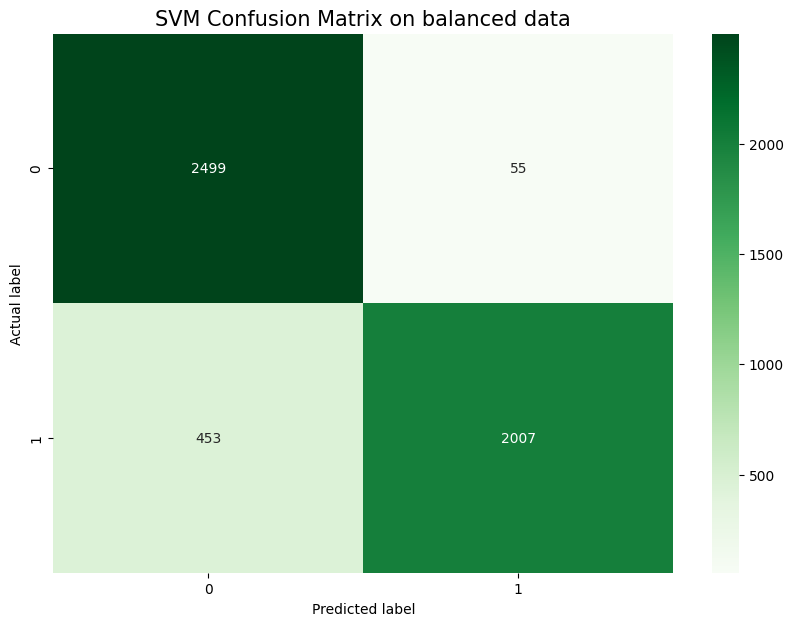

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('SVM Confusion Matrix on balanced data', size=15)
plt.savefig("SVM_balanced.png")
plt.show()


In [ ]:
# Split the data into training and test sets
from xgboost import XGBClassifier

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
model.fit(X_train1, y_train1)
y_pred = model.predict(X_test1)
print('XGBoost Accuracy:', accuracy_score(y_test1, y_pred))

class_labels = np.unique(np.concatenate((y_test1, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test1, y_pred, target_names=class_labels_str)
print(report)



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.7967086156824782
              precision    recall  f1-score   support

           0       0.49      0.28      0.36       625
           1       0.84      0.93      0.88      2474

    accuracy                           0.80      3099
   macro avg       0.66      0.60      0.62      3099
weighted avg       0.77      0.80      0.77      3099



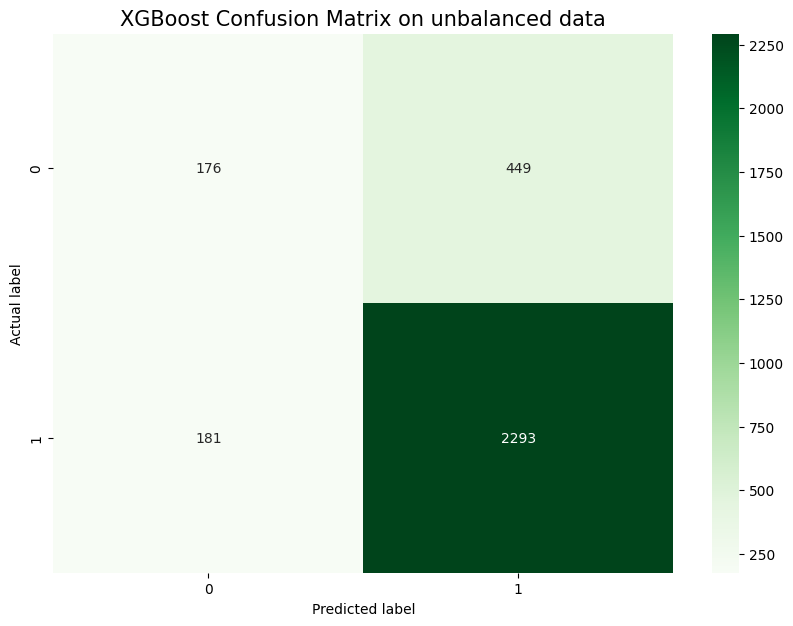

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test1, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('XGBoost Confusion Matrix on unbalanced data', size=15)
plt.savefig("xgboost_unbalanced")
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)



In [ ]:

# XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)




/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8765456721180694
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2554
           1       0.84      0.92      0.88      2460

    accuracy                           0.88      5014
   macro avg       0.88      0.88      0.88      5014
weighted avg       0.88      0.88      0.88      5014



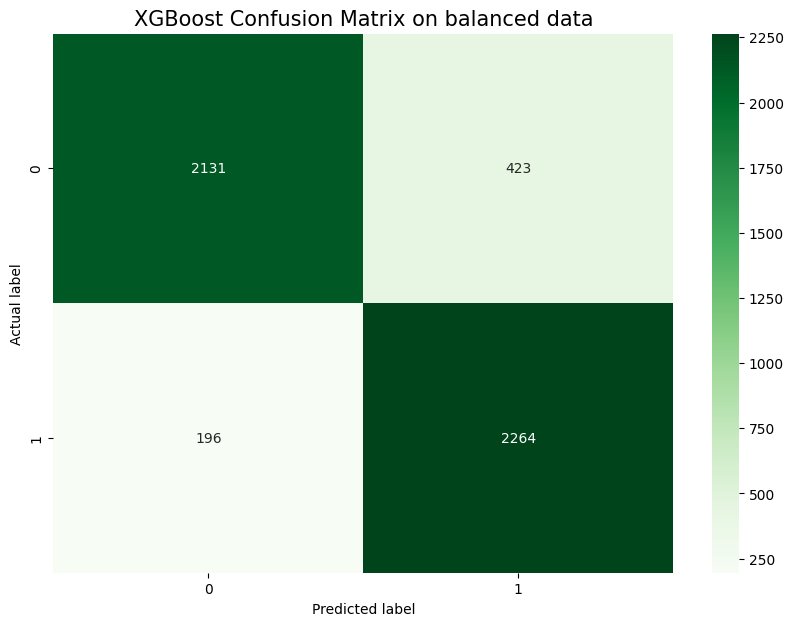

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('XGBoost Confusion Matrix on balanced data', size=15)
plt.savefig("xgboost_balanced.png")
plt.show()




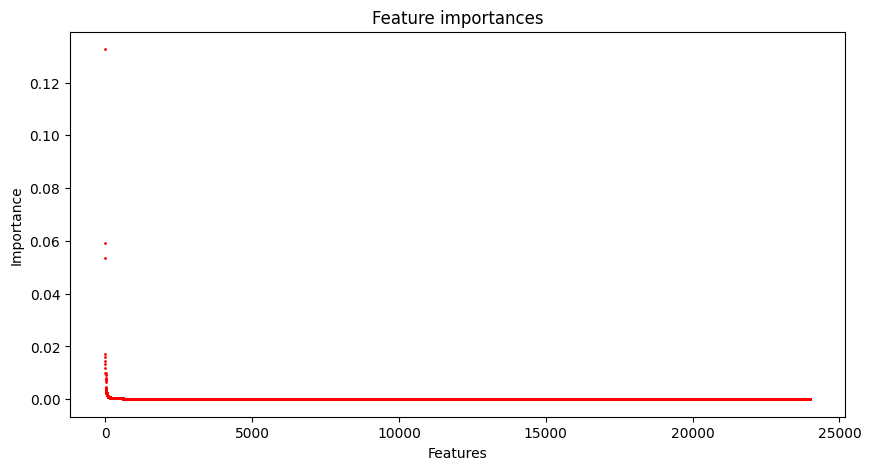

In [ ]:

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.scatter(range(X_train.shape[1]), importances[indices], color='r', s=1)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


In [ ]:
importance_series = pd.Series(importances, index=X.columns)

top_10_features = importance_series.sort_values(ascending=False)[:10].index

# Select the important features from the original DataFrame
df_important = df[top_10_features]
df_important

X_10 = df_important
y = df['is_Epithelial_cells']


# Print the original class distribution
print('Original dataset shape %s' % Counter(y))

# Initialize the ADASYN sampler
adasyn = ADASYN(random_state=42)

# Fit and resample the data
X_res10, y_res = adasyn.fit_resample(X_10, y)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))


# Split the data into training and test sets
X_train10, X_test10, y_train10, y_test10 = train_test_split(X_res10, y_res, test_size=0.2, random_state=42)
# XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)

Original dataset shape Counter({1: 12345, 0: 3150})
Resampled dataset shape Counter({0: 12916, 1: 12345})


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8765456721180694
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2554
           1       0.84      0.92      0.88      2460

    accuracy                           0.88      5014
   macro avg       0.88      0.88      0.88      5014
weighted avg       0.88      0.88      0.88      5014



In [ ]:
from xgboost import XGBClassifier

# Prepare an empty list to store accuracy results
accuracy_results = []

# Prepare an empty list to store number of features
features_count = []

for i in range(9, 0, -1):
    # Select the top i features
    top_features = importance_series.sort_values(ascending=False)[:i].index
    df_important = df[top_features]
    X_i = df_important
    y = df['is_Epithelial_cells']

    # Resample with ADASYN
    X_res_i, y_res = ADASYN(random_state=42).fit_resample(X_i, y)

    # Split the data into training and test sets
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_res_i, y_res, test_size=0.2, random_state=42)

    # Fit the XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
    model.fit(X_train_i, y_train_i)

    # Predict and evaluate the model
    y_pred_i = model.predict(X_test_i)
    accuracy = accuracy_score(y_test_i, y_pred_i)
    print(f'\nTop {i} Features:')
    print(f'XGBoost Accuracy: {accuracy}')
    class_labels = np.unique(np.concatenate((y_test_i, y_pred_i)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test_i, y_pred_i, target_names=class_labels_str)
    print(report)

    accuracy_results.append(accuracy)
    features_count.append(i)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Top 9 Features:
XGBoost Accuracy: 0.7289095690875986
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      2523
           1       0.72      0.73      0.72      2420

    accuracy                           0.73      4943
   macro avg       0.73      0.73      0.73      4943
weighted avg       0.73      0.73      0.73      4943



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Top 8 Features:
XGBoost Accuracy: 0.7290570619182517
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      2481
           1       0.72      0.74      0.73      2461

    accuracy                           0.73      4942
   macro avg       0.73      0.73      0.73      4942
weighted avg       0.73      0.73      0.73      4942



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Top 7 Features:
XGBoost Accuracy: 0.7312992125984252
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      2610
           1       0.73      0.71      0.72      2470

    accuracy                           0.73      5080
   macro avg       0.73      0.73      0.73      5080
weighted avg       0.73      0.73      0.73      5080



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Top 6 Features:
XGBoost Accuracy: 0.711764705882353
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2441
           1       0.72      0.71      0.71      2489

    accuracy                           0.71      4930
   macro avg       0.71      0.71      0.71      4930
weighted avg       0.71      0.71      0.71      4930



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Top 5 Features:
XGBoost Accuracy: 0.710403569255729
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      2477
           1       0.70      0.72      0.71      2454

    accuracy                           0.71      4931
   macro avg       0.71      0.71      0.71      4931
weighted avg       0.71      0.71      0.71      4931



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Top 4 Features:
XGBoost Accuracy: 0.6996062992125984
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2622
           1       0.69      0.68      0.69      2458

    accuracy                           0.70      5080
   macro avg       0.70      0.70      0.70      5080
weighted avg       0.70      0.70      0.70      5080



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Top 3 Features:
XGBoost Accuracy: 0.7108742845865403
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      2604
           1       0.71      0.68      0.69      2463

    accuracy                           0.71      5067
   macro avg       0.71      0.71      0.71      5067
weighted avg       0.71      0.71      0.71      5067



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Top 2 Features:
XGBoost Accuracy: 0.6112740989103101
              precision    recall  f1-score   support

           0       0.64      0.47      0.55      2343
           1       0.59      0.74      0.66      2429

    accuracy                           0.61      4772
   macro avg       0.62      0.61      0.60      4772
weighted avg       0.62      0.61      0.60      4772



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Top 1 Features:
XGBoost Accuracy: 0.6211453744493393
              precision    recall  f1-score   support

           0       0.66      0.52      0.58      2536
           1       0.59      0.72      0.65      2458

    accuracy                           0.62      4994
   macro avg       0.63      0.62      0.62      4994
weighted avg       0.63      0.62      0.62      4994



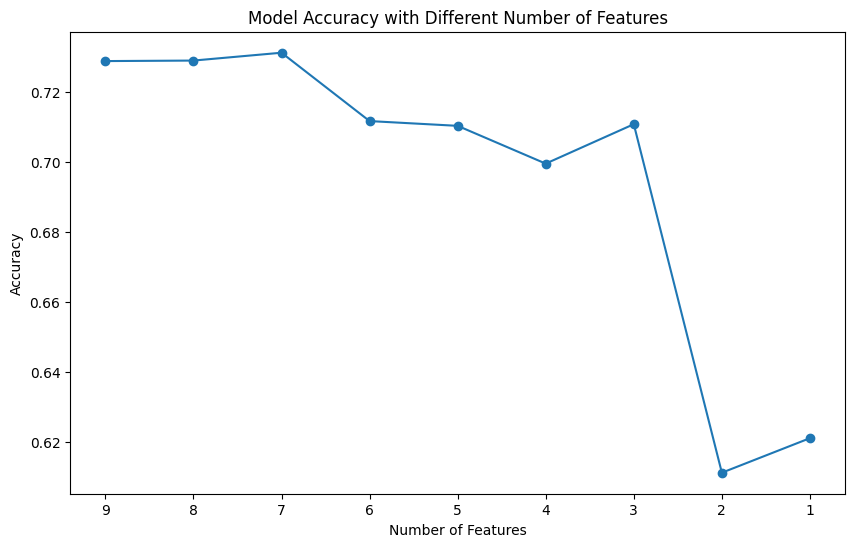

In [ ]:
# Now let's plot the results
plt.figure(figsize=(10, 6))
plt.plot(features_count, accuracy_results, marker='o')
plt.title('Model Accuracy with Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.gca().invert_xaxis() # invert the x-axis
plt.show()


## patient detection

In [ ]:

display(df)

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
X = df.drop(['reference','tumourID','CellType'], axis=1)
y = df['tumourID']
display(X)
display(y)

,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,RP11-206L10.9,FAM87B,LINC00115,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.501,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.455,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,0.0,0.0,0.505,0.505,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


0        SC162
1        SC162
2        SC162
3        SC162
4        SC162
         ...  
15490    SC156
15491    SC156
15492    SC156
15493    SC156
15494    SC156
Name: tumourID, Length: 15495, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# XGBoost
from sklearn.preprocessing import LabelEncoder
# Encode the string labels as integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels
class_labels = y.unique()

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

print(report)


XGBoost Accuracy: 0.9932236205227493
              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00       917
       SC174       1.00      1.00      1.00       429
       SC172       0.99      0.97      0.98       487
       SC177       0.98      1.00      0.99       681
       SC156       1.00      0.99      1.00       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099



[[917   0   0   0   0]
 [  0 429   0   0   0]
 [  0   1 472  14   0]
 [  0   1   2 678   0]
 [  0   0   2   1 582]]


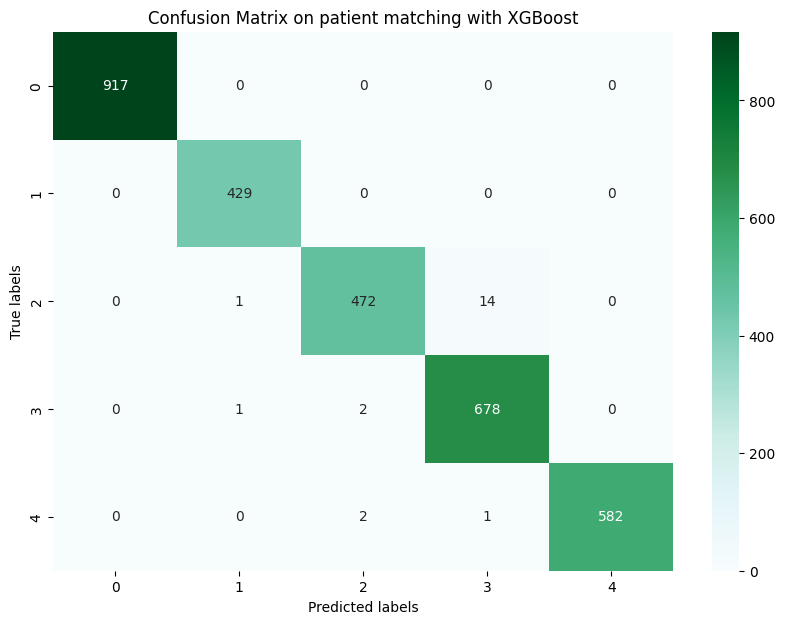

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='BuGn')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on patient matching with XGBoost')
plt.savefig("xgboost_pm.png")
plt.show()

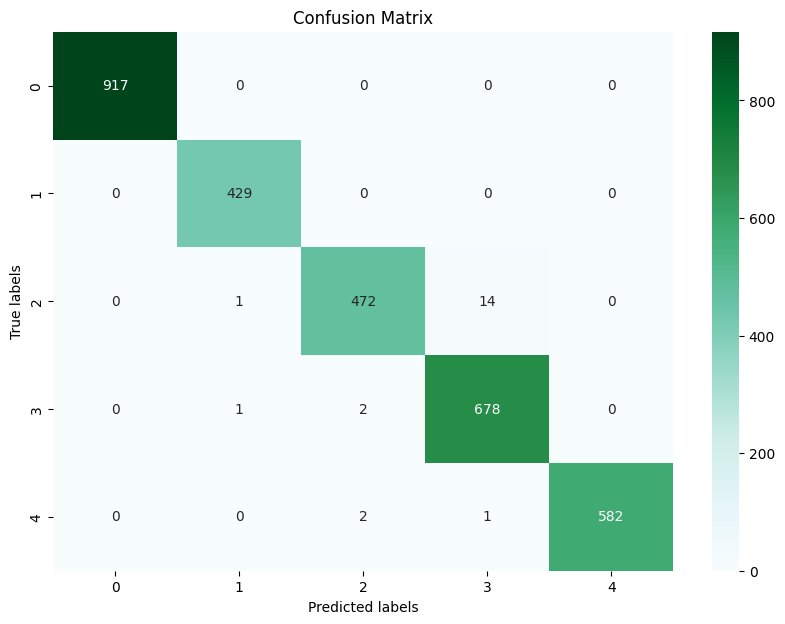

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='BuGn')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig("xgboost_pm.png")
plt.show()


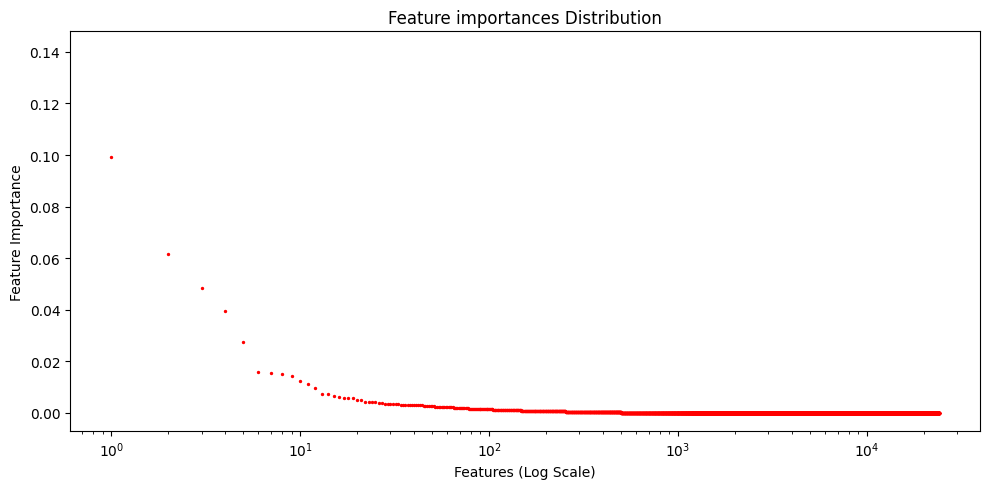

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature importances Distribution")
plt.scatter(range(X_train.shape[1]), importances[indices], color='r', s=2)
plt.xscale("log")  # Set the y-axis to a logarithmic scale
plt.ylabel("Feature Importance")
plt.xlabel("Features (Log Scale)")
plt.savefig("feature_importance_RF")

plt.tight_layout()
plt.show()



In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
# Create lists to store results
acc_list_XGB = []
num_high_list_XGB = []
num_feature_list_XGB = []
importance_series = pd.Series(importances, index=X.columns)

for i in [1,3,5,10,30,50]:
    top_features = importance_series.sort_values(ascending=False)[:i].index
    df_important = df[top_features]
    X_i = df_important
    y = df['tumourID']

    # Split the data into training and test sets
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y, test_size=0.2, random_state=42)
    # Split the data into training and test sets
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


    # Use XGBoost Classifier
    model = XGBClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print results
    print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))
    class_labels = y.unique()
    report = classification_report(y_test, y_pred, target_names=class_labels)
    print(report)

    acc_list_XGB.append(accuracy_score(y_test, y_pred))








KeyboardInterrupt: ignored

In [ ]:
from imblearn.over_sampling import RandomOverSampler
importance_series = pd.Series(importances, index=X.columns)

top_10_features = importance_series.sort_values(ascending=False)[:10].index
from xgboost import XGBClassifier

# Prepare an empty list to store accuracy results
accuracy_results = []

# Prepare an empty list to store number of features
features_count = []

for i in range(10, 0, -1):
    # Select the top i features
    top_features = importance_series.sort_values(ascending=False)[:i].index
    df_important = df[top_features]
    X_i = df_important
    y = df['tumourID']

    # Resample
    ros = RandomOverSampler(random_state=42)
    X_res_i, y_res = ros.fit_resample(X_i, y)

    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y_res)

    # Split the data into training and test sets
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_res_i, y_encoded, test_size=0.2, random_state=42)

    # Fit the XGBoost model
    model = xgb.XGBClassifier()
    model.fit(X_train_i, y_train_i)

    # Predict and evaluate the model
    y_pred_i = model.predict(X_test_i)
    accuracy = accuracy_score(y_test_i, y_pred_i)
    print(f'\nTop {i} Features:')
    print(f'XGBoost Accuracy: {accuracy}')
    class_labels = np.unique(np.concatenate((y_test_i, y_pred_i)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test_i, y_pred_i, target_names=class_labels_str)
    print(report)

    accuracy_results.append(accuracy)
    features_count.append(i)



Top 10 Features:
XGBoost Accuracy: 0.9787099494097807
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       956
           1       0.99      0.99      0.99       902
           2       0.97      0.97      0.97       935
           3       0.95      0.97      0.96       982
           4       0.99      0.98      0.99       969

    accuracy                           0.98      4744
   macro avg       0.98      0.98      0.98      4744
weighted avg       0.98      0.98      0.98      4744


Top 9 Features:
XGBoost Accuracy: 0.9692242833052277
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       956
           1       0.97      0.99      0.98       902
           2       0.96      0.96      0.96       935
           3       0.94      0.97      0.96       982
           4       0.98      0.96      0.97       969

    accuracy                           0.97      4744
   macro avg       0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


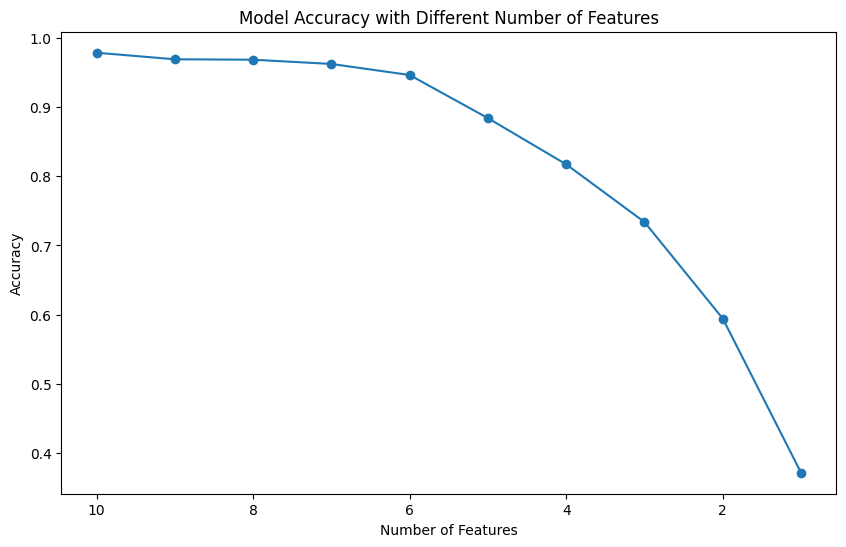

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(features_count, accuracy_results, marker='o')
plt.title('Model Accuracy with Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.gca().invert_xaxis() # invert the x-axis
plt.show()


# GBDT

## tumour detection

In [ ]:
df['is_Epithelial_cells'] = df['CellType'].apply(lambda x: 1 if x == 'Epithelial cells' else 0)

counts = df['is_Epithelial_cells'].value_counts()

print(counts)
display(df)

1    12345
0     3150
Name: is_Epithelial_cells, dtype: int64


,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1,is_Epithelial_cells
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547,1
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1


In [ ]:
X = df.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y = df['is_Epithelial_cells']
display(X)
display(y)

,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,RP11-206L10.9,FAM87B,LINC00115,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.501,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.455,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,0.0,0.0,0.505,0.505,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


0        0
1        1
2        1
3        1
4        1
        ..
15490    1
15491    1
15492    1
15493    1
15494    1
Name: is_Epithelial_cells, Length: 15495, dtype: int64

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_classification
from collections import Counter

# Print the original class distribution
print('Original dataset shape %s' % Counter(y))

# Initialize the ADASYN sampler
adasyn = ADASYN(random_state=42)

# Fit and resample the data
X_res, y_res = adasyn.fit_resample(X, y)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({1: 12345, 0: 3150})
Resampled dataset shape Counter({0: 12725, 1: 12345})


In [ ]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Decision Tree (GBDT)
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train1, y_train1)
y_pred = model.predict(X_test1)
print('GBDT Accuracy:', accuracy_score(y_test1, y_pred))

class_labels = np.unique(np.concatenate((y_test1, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)

GBDT Accuracy: 0.8060664730558245
              precision    recall  f1-score   support

           0       0.53      0.34      0.41       625
           1       0.85      0.92      0.88      2474

    accuracy                           0.81      3099
   macro avg       0.69      0.63      0.65      3099
weighted avg       0.78      0.81      0.79      3099



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Decision Tree (GBDT)
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('GBDT Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)



GBDT Accuracy: 0.8683685680095732
              precision    recall  f1-score   support

           0       0.90      0.83      0.87      2554
           1       0.84      0.91      0.87      2460

    accuracy                           0.87      5014
   macro avg       0.87      0.87      0.87      5014
weighted avg       0.87      0.87      0.87      5014



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Support Vector Machine (SVM)
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('SVM Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)


## patient detection

In [ ]:

display(df)

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
X = df.drop(['reference','tumourID','CellType'], axis=1)
y = df['tumourID']
display(X)
display(y)

,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,RP11-206L10.9,FAM87B,LINC00115,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.501,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.455,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,0.0,0.0,0.505,0.505,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


0        SC162
1        SC162
2        SC162
3        SC162
4        SC162
         ...  
15490    SC156
15491    SC156
15492    SC156
15493    SC156
15494    SC156
Name: tumourID, Length: 15495, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:


from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Decision Tree (GBDT)
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('GBDT Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)


GBDT Accuracy: 0.9867699257825104
              precision    recall  f1-score   support

       SC156       1.00      0.99      1.00       917
       SC162       0.99      1.00      0.99       429
       SC172       0.99      0.95      0.97       487
       SC174       0.96      0.99      0.98       681
       SC177       0.99      0.99      0.99       585

    accuracy                           0.99      3099
   macro avg       0.99      0.99      0.99      3099
weighted avg       0.99      0.99      0.99      3099



##svm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: ignored

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))
# Now get the unique class labels
class_labels = y.unique()
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)
print(report)


Linear SVM Accuracy: 0.9970958373668926
              precision    recall  f1-score   support

       SC162       1.00      1.00      1.00       917
       SC174       1.00      1.00      1.00       429
       SC172       0.99      0.99      0.99       487
       SC177       1.00      1.00      1.00       681
       SC156       1.00      1.00      1.00       585

    accuracy                           1.00      3099
   macro avg       1.00      1.00      1.00      3099
weighted avg       1.00      1.00      1.00      3099



[[917   0   0   0   0]
 [  0 429   0   0   0]
 [  0   1 483   3   0]
 [  1   0   2 678   0]
 [  0   0   2   0 583]]


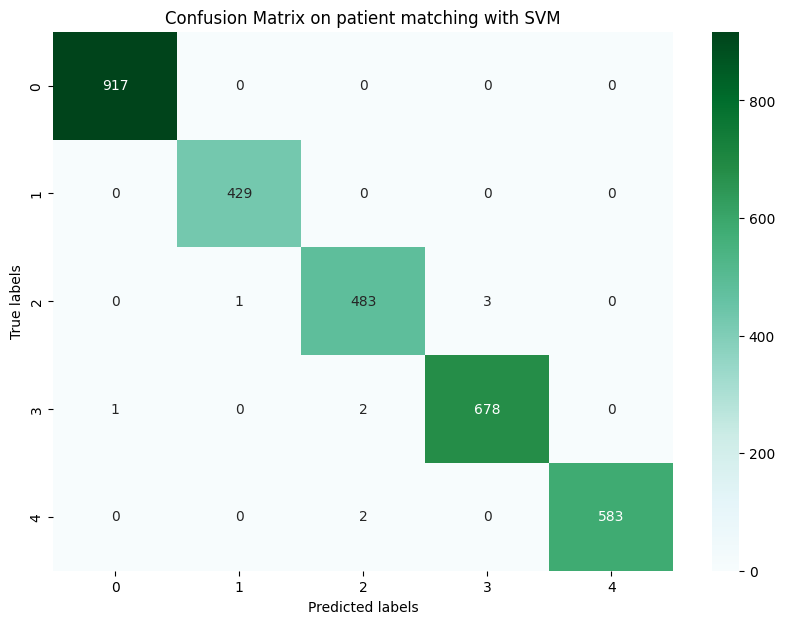

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='BuGn')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on patient matching with SVM')
plt.savefig("smv_pm.png")
plt.show()


In [ ]:
from sklearn.svm import SVC

# Assume you have your data X_train, y_train loaded
# and a list feature_names with the names of your features

feature_names = X_train.columns.tolist()
# 2. Rank features based on absolute weights
feature_weights = model.coef_[0]
ranked_features_indices = sorted(range(len(feature_weights)), key=lambda i: abs(feature_weights[i]), reverse=True)

# 3. Map numerical indices to actual feature names
ranked_feature_names = [feature_names[i] for i in ranked_features_indices]

# 4. Select top 100 feature names
top_100_feature_names = ranked_feature_names[:100]

print("Top 100 features:", top_100_feature_names)

Top 100 features: ['RPL41', 'RPL17', 'TFF3', 'MSMB', 'PPDPF', 'RPS24', 'KLK11', 'ADIRF', 'KLK12', 'OGN', 'RPS4Y1', 'IGF1', 'MT2A', 'NBEAL1', 'TMBIM4', 'HLA-DRB1', 'ZBTB16', 'IGFBP3', 'RPL39', 'HLA-DRB5', 'SPRY1', 'TMSB4X', 'CPM', 'PLA2G2A', 'C15orf48', 'VIM', 'RPL34', 'RPL13', 'THSD7A', 'HOPX', 'RPS25', 'ITM2B', 'FXYD3', 'FKBP5', 'NPY', 'AGR2', 'IER3', 'B2M', 'SAT1', 'RPS20', 'CST1', 'ENPP2', 'G0S2', 'TPT1', 'LY6E', 'PRSS23', 'MIPEP', 'NUDT4', 'VGLL3', 'SNHG19', 'PRAC1', 'RPL9', 'MALAT1', 'GDF15', 'SMIM22', 'RPSA', 'RPS3', 'CXCL8', 'RPS6', 'SOX4', 'MAP1LC3B', 'EIF5', 'CAMK2N1', 'FABP5', 'ANK3', 'RPL26', 'NDUFS5', 'CPE', 'HES4', 'MZT2B', 'CANX', 'BRI3', 'C11orf96', 'CHMP4B', 'IFI16', 'SNHG25', 'NCL', 'RHOB', 'BRD2', 'ELK4', 'JUNB', 'LDHA', 'ANPEP', 'EIF3H', 'UQCR11', 'SMDT1', 'AMD1', 'MPC2', 'RPL14', 'HINT1', 'ATP1A1', 'NUCB2', 'CCNI', 'RPS21', 'LTBP1', 'MTDH', 'NUDT8', 'BTG2', 'AC090498.1', 'RPL35A']


In [ ]:
# Filter your training data using these indices
X_train_top_100 = X_train[top_100_feature_names]

# Do the same for the test set or any other dataset you want to filter
X_test_top_100 = X_test[top_100_feature_names]
# Using only the top 100 features to train a new SVM model

svm_model_top_100 = LinearSVC(max_iter=10000)
svm_model_top_100.fit(X_train_top_100, y_train)

# If you have a test set:
# Evaluate its performance
accuracy_top_100 = svm_model_top_100.score(X_test_top_100, y_test)
print(f"Accuracy with top 100 features: {accuracy_top_100:.2f}")


Accuracy with top 100 features: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#5 different patients

In [ ]:
df

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1,is_Epithelial_cells
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547,1
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1


In [ ]:
unique_tumorIDs = df['tumourID'].unique()
unique_tumorIDs

array(['SC162', 'SC174', 'SC172', 'SC177', 'SC156'], dtype=object)

In [ ]:
df_SC162 = df[df['tumourID'] == 'SC162']
df_SC174 = df[df['tumourID'] == 'SC174']
df_SC172 = df[df['tumourID'] == 'SC172']
df_SC177 = df[df['tumourID'] == 'SC177']
df_SC156 = df[df['tumourID'] == 'SC156']

## patient 162

In [ ]:
X_162 = df_SC162.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y_162= df_SC162['is_Epithelial_cells']


In [ ]:
# Print the original class distribution
print('Original dataset shape %s' % Counter(y_162))

# Initialize the random over sampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the data
X_res, y_res = ros.fit_resample(X_162, y_162)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 1722, 0: 475})
Resampled dataset shape Counter({0: 1722, 1: 1722})


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)



Random Forest Accuracy: 0.9637155297532656
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       350
           1       0.93      1.00      0.96       339

    accuracy                           0.96       689
   macro avg       0.97      0.96      0.96       689
weighted avg       0.97      0.96      0.96       689



In [ ]:
X = df_important162
y = df_SC162['is_Epithelial_cells']


# Print the original class distribution
print('Original dataset shape %s' % Counter(y))

# Initialize the random over sampler
ros = RandomOverSampler(random_state=42)


# Fit and resample the data
X_res, y_res = ros.fit_resample(X, y)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)

Original dataset shape Counter({1: 1722, 0: 475})
Resampled dataset shape Counter({0: 1722, 1: 1722})
Random Forest Accuracy: 0.918722786647315
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       350
           1       0.96      0.87      0.91       339

    accuracy                           0.92       689
   macro avg       0.92      0.92      0.92       689
weighted avg       0.92      0.92      0.92       689



## patient 172


In [ ]:
X_172 = df_SC172.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y_172 = df_SC172['is_Epithelial_cells']


In [ ]:
# Print the original class distribution
print('Original dataset shape %s' % Counter(y_172))

# Initialize the random over sampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the data
X_res, y_res = ros.fit_resample(X_172, y_172)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 1776, 0: 600})
Resampled dataset shape Counter({1: 1776, 0: 1776})


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)



Random Forest Accuracy: 0.9310829817158931
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       361
           1       0.88      1.00      0.93       350

    accuracy                           0.93       711
   macro avg       0.94      0.93      0.93       711
weighted avg       0.94      0.93      0.93       711



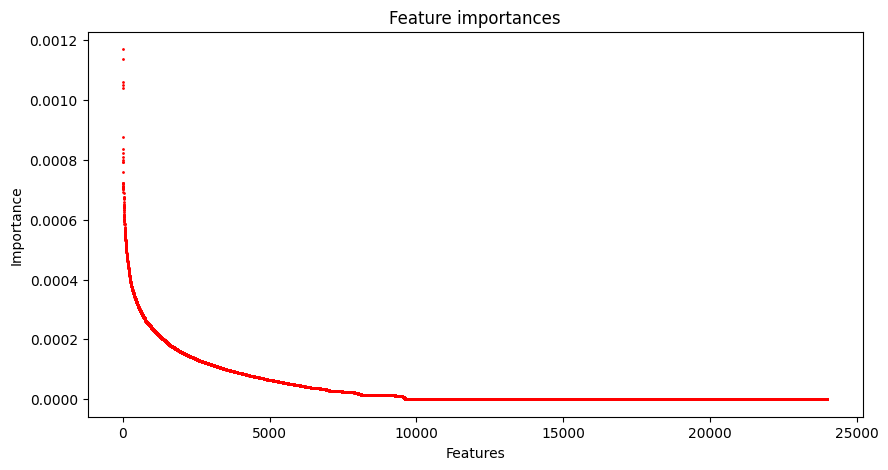

In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.scatter(range(X_train.shape[1]), importances[indices], color='r', s=1)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


In [ ]:
X = df_SC172.drop(['reference', 'tumourID', 'CellType', 'is_Epithelial_cells'], axis=1)
y = df_SC172['is_Epithelial_cells']

# Create a pandas series with feature names as the index and feature importances as values
importance_series = pd.Series(importances, index=X.columns)

# Sort the series in descending order and select the top 8 features
top_8_features = importance_series.sort_values(ascending=False)[:8].index

# Select the important features from the original DataFrame
df_important172 = df_SC172[top_8_features]
df_important172

,MSRB2,GAPDH,CHCHD2,DUSP1,DFFA,ATP5E,RPL12,RPL35
5539,0.000,2.464,0.000,0.000,0.0,2.464,0.000,3.114
5540,0.000,2.110,1.764,1.229,0.0,0.000,2.572,1.764
5541,0.000,3.056,2.047,0.000,0.0,0.000,4.006,3.056
5542,0.000,1.949,1.389,0.000,0.0,0.000,1.949,2.306
5543,2.825,0.000,0.000,0.000,0.0,2.825,4.719,0.000
...,...,...,...,...,...,...,...,...
7910,0.000,0.000,0.000,2.764,0.0,0.000,3.820,2.764
7911,0.000,2.859,2.859,0.000,0.0,0.000,5.109,4.602
7912,0.000,0.000,4.231,0.000,0.0,0.000,4.231,3.553
7913,0.000,0.000,0.000,0.000,0.0,4.077,4.077,3.680


In [ ]:
X = df_important172
y = df_SC172['is_Epithelial_cells']


# Print the original class distribution
print('Original dataset shape %s' % Counter(y))

# Initialize the random over sampler
ros = RandomOverSampler(random_state=42)


# Fit and resample the data
X_res, y_res = ros.fit_resample(X, y)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)


Original dataset shape Counter({1: 1776, 0: 600})
Resampled dataset shape Counter({1: 1776, 0: 1776})
Random Forest Accuracy: 0.8635724331926864
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       361
           1       0.88      0.84      0.86       350

    accuracy                           0.86       711
   macro avg       0.86      0.86      0.86       711
weighted avg       0.86      0.86      0.86       711



## patient 174

In [ ]:
X_174 = df_SC174.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y_174 = df_SC174['is_Epithelial_cells']


In [ ]:
# Print the original class distribution
print('Original dataset shape %s' % Counter(y_174))

# Initialize the random over sampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the data
X_res, y_res = ros.fit_resample(X_174, y_174)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 1841, 1: 1501})
Resampled dataset shape Counter({0: 1841, 1: 1841})


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)



Random Forest Accuracy: 0.6146540027137042
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       379
           1       0.63      0.49      0.55       358

    accuracy                           0.61       737
   macro avg       0.62      0.61      0.61       737
weighted avg       0.62      0.61      0.61       737



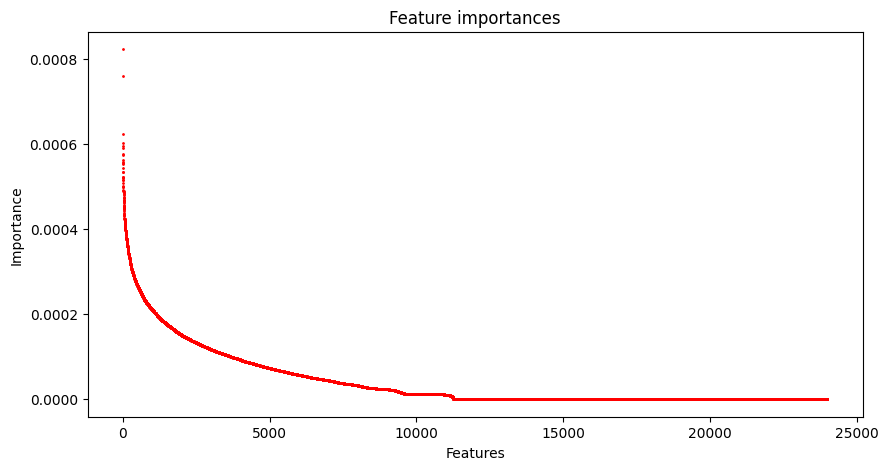

In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.scatter(range(X_train.shape[1]), importances[indices], color='r', s=1)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


In [ ]:
X = df_SC174.drop(['reference', 'tumourID', 'CellType', 'is_Epithelial_cells'], axis=1)
y = df_SC174['is_Epithelial_cells']

# Create a pandas series with feature names as the index and feature importances as values
importance_series = pd.Series(importances, index=X.columns)

# Sort the series in descending order and select the top 8 features
top_8_features = importance_series.sort_values(ascending=False)[:8].index

# Select the important features from the original DataFrame
df_important174 = df_SC174[top_8_features]
df_important174

,SLC4A7,COX7B,COX6C,CAPZB,PFDN2,NACA,SNX3,WNK1
2197,0.459,0.459,1.734,0.000,0.459,2.538,0.459,0.459
2198,0.000,0.000,0.000,0.000,0.000,2.493,0.000,0.000
2199,0.000,0.000,0.000,2.676,2.676,4.009,0.000,0.000
2200,0.000,0.000,0.000,0.000,0.000,1.949,0.000,0.000
2201,0.000,0.000,0.000,0.000,0.000,3.739,0.000,0.000
...,...,...,...,...,...,...,...,...
5534,0.000,0.000,0.000,0.000,0.000,3.410,0.000,0.000
5535,0.000,1.405,1.405,0.000,0.000,2.796,1.967,0.000
5536,0.000,0.000,0.000,0.000,1.568,2.995,0.000,0.000
5537,0.000,0.000,1.377,1.377,0.000,2.933,1.377,0.000


In [ ]:
X = df_important174
y = df_SC174['is_Epithelial_cells']


# Print the original class distribution
print('Original dataset shape %s' % Counter(y))

# Initialize the random over sampler
ros = RandomOverSampler(random_state=42)


# Fit and resample the data
X_res, y_res = ros.fit_resample(X, y)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)

Original dataset shape Counter({0: 1841, 1: 1501})
Resampled dataset shape Counter({0: 1841, 1: 1841})
Random Forest Accuracy: 0.5970149253731343
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       379
           1       0.58      0.60      0.59       358

    accuracy                           0.60       737
   macro avg       0.60      0.60      0.60       737
weighted avg       0.60      0.60      0.60       737



## patient 177

In [ ]:
X_177 = df_SC177.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y_177 = df_SC177['is_Epithelial_cells']


In [ ]:
# Print the original class distribution
print('Original dataset shape %s' % Counter(y_177))

# Initialize the random over sampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the data
X_res, y_res = ros.fit_resample(X_177, y_177)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 2697, 0: 139})
Resampled dataset shape Counter({1: 2697, 0: 2697})


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)



Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       526
           1       1.00      1.00      1.00       553

    accuracy                           1.00      1079
   macro avg       1.00      1.00      1.00      1079
weighted avg       1.00      1.00      1.00      1079



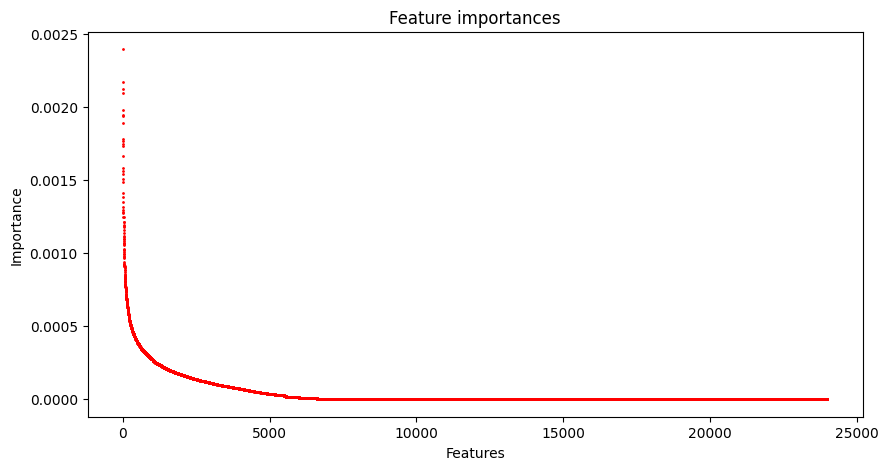

In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.scatter(range(X_train.shape[1]), importances[indices], color='r', s=1)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


In [ ]:
X = df_SC177.drop(['reference', 'tumourID', 'CellType', 'is_Epithelial_cells'], axis=1)
y = df_SC177['is_Epithelial_cells']

# Create a pandas series with feature names as the index and feature importances as values
importance_series = pd.Series(importances, index=X.columns)

# Sort the series in descending order and select the top 8 features
top_8_features = importance_series.sort_values(ascending=False)[:8].index

# Select the important features from the original DataFrame
df_important177 = df_SC177[top_8_features]
df_important177

,LIN7C,MGST3,SHFM1,GOLIM4,BMPR2,PWWP2B,GGT7,FLJ20021
7915,0.000,1.178,0.000,0.000,0.000,0.0,0.0,0.000
7916,0.000,1.219,1.753,0.000,0.000,0.0,0.0,0.000
7917,0.000,0.000,1.072,0.000,0.000,0.0,0.0,1.072
7918,0.498,0.498,2.168,0.000,0.000,0.0,0.0,1.077
7919,0.000,0.000,1.275,0.279,0.000,0.0,0.0,0.676
...,...,...,...,...,...,...,...,...
10746,0.000,1.001,0.000,0.000,1.491,0.0,0.0,0.000
10747,0.000,1.653,0.879,0.000,0.879,0.0,0.0,0.000
10748,0.000,1.487,0.997,0.000,0.997,0.0,0.0,0.000
10749,0.000,0.000,1.083,0.000,0.000,0.0,0.0,0.000


In [ ]:
X = df_important177
y = df_SC177['is_Epithelial_cells']


# Print the original class distribution
print('Original dataset shape %s' % Counter(y))

# Initialize the random over sampler
ros = RandomOverSampler(random_state=42)


# Fit and resample the data
X_res, y_res = ros.fit_resample(X, y)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)

Original dataset shape Counter({1: 2697, 0: 139})
Resampled dataset shape Counter({1: 2697, 0: 2697})
Random Forest Accuracy: 0.974050046339203
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       526
           1       1.00      0.95      0.97       553

    accuracy                           0.97      1079
   macro avg       0.97      0.97      0.97      1079
weighted avg       0.98      0.97      0.97      1079



## patient 156


In [ ]:
X_156 = df_SC156.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y_156 = df_SC156['is_Epithelial_cells']


In [ ]:
# Print the original class distribution
print('Original dataset shape %s' % Counter(y_156))

# Initialize the random over sampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the data
X_res, y_res = ros.fit_resample(X_156, y_156)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 4649, 0: 95})
Resampled dataset shape Counter({1: 4649, 0: 4649})


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)



Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       945
           1       1.00      1.00      1.00       915

    accuracy                           1.00      1860
   macro avg       1.00      1.00      1.00      1860
weighted avg       1.00      1.00      1.00      1860



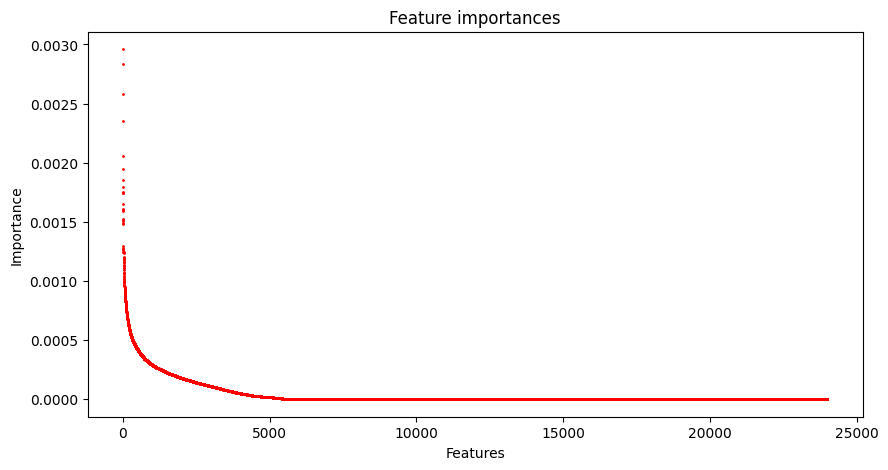

In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.scatter(range(X_train.shape[1]), importances[indices], color='r', s=1)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


In [ ]:
X = df_SC156.drop(['reference', 'tumourID', 'CellType', 'is_Epithelial_cells'], axis=1)
y = df_SC156['is_Epithelial_cells']

# Create a pandas series with feature names as the index and feature importances as values
importance_series = pd.Series(importances, index=X.columns)

# Sort the series in descending order and select the top 8 features
top_8_features = importance_series.sort_values(ascending=False)[:8].index

# Select the important features from the original DataFrame
df_important156 = df_SC156[top_8_features]
df_important156

,CHAMP1,SBNO1,NBN,CXADR,C9orf16,PBX3,TSC22D1,MFF
10751,0.0,0.000,0.000,0.506,0.000,0.506,0.841,0.506
10752,0.0,0.644,0.373,0.644,0.373,0.373,0.644,0.000
10753,0.0,0.000,0.000,1.012,0.629,0.000,1.289,0.363
10754,0.0,0.765,0.454,1.669,0.454,0.252,0.890,0.252
10755,0.0,0.372,0.642,1.030,0.372,0.000,0.372,0.642
...,...,...,...,...,...,...,...,...
15490,0.0,0.000,0.000,0.000,1.088,0.000,1.596,0.000
15491,0.0,0.000,0.000,0.000,0.464,0.000,0.464,0.780
15492,0.0,0.000,0.000,0.000,0.713,0.000,1.417,0.000
15493,0.0,1.090,0.000,0.000,0.000,0.000,1.934,0.000


In [ ]:
X = df_important156
y = df_SC156['is_Epithelial_cells']


# Print the original class distribution
print('Original dataset shape %s' % Counter(y))

# Initialize the random over sampler
ros = RandomOverSampler(random_state=42)


# Fit and resample the data
X_res, y_res = ros.fit_resample(X, y)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)

Original dataset shape Counter({1: 4649, 0: 95})
Resampled dataset shape Counter({1: 4649, 0: 4649})
Random Forest Accuracy: 0.9956989247311828
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       945
           1       1.00      0.99      1.00       915

    accuracy                           1.00      1860
   macro avg       1.00      1.00      1.00      1860
weighted avg       1.00      1.00      1.00      1860



Text(0.5, 1.0, 'Accuarcy for 5 patients')

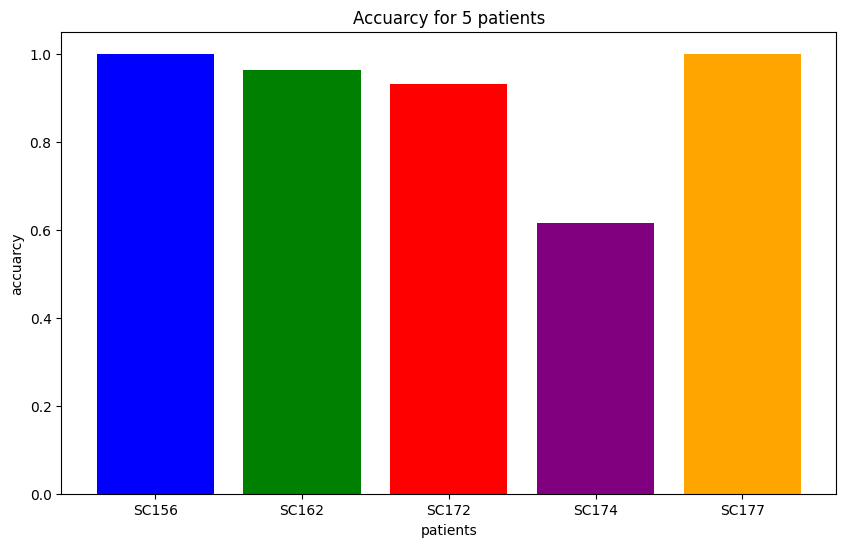

In [ ]:
import matplotlib.pyplot as plt

# example data
categories = ['SC156','SC162', 'SC172', 'SC174', 'SC177']
values = [1,0.9637155297532656,0.9310829817158931,0.6146540027137042,1.0]


# specify colors for each category
colors = ['blue', 'green', 'red', 'purple', 'orange']

# create a bar chart with different colors
plt.figure(figsize=(10,6))
plt.bar(categories, values, color=colors)

plt.xlabel('patients')
plt.ylabel('accuarcy')
plt.title('Accuarcy for 5 patients')


##